# Agrupamiento por aglomeración

Otra técnica que puede resultar útil es el agrupamiento por aglomeración donde inicialmente todos los elementos están en su propio grupo o cluster y los grupos se van uniendo dependiendo de su posición en el espacio. Si están muy juntos, se unen, y así se van formando cada vez menos cluster hasta que se forma el número deseado de grupos.

Para unir dos grupos se pueden usar varios criterios de similaridad. El método de `AgglomerativeClustering` admite los siguientes:

Sean $A$ y $B$ dos conjuntos, $\mu_X$ el centroide de $X$ y $d$ la función distancia.

- Ward: Se busca minimizar la expresión: $\frac{|A|\cdot|B|}{|A\cap B|} \left\lVert  \mu_A - \mu_B\right\rVert^2$ 
- Complete: Se minimiza $$\max_{a\in A, b\in B } d(a,b)$$
- Average: Se minimiza $$\frac{1}{|A|\cdot|B|}\sum_{a\in A}\sum_{b\in B}d(a,b)$$
- Single: Se minimiza $$\min_{a\in A, b\in B } d(a,b)$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

En el siguiente ejemplo se ven las diferentes formas de formar los cluster en un conjunto de datos sencillo.

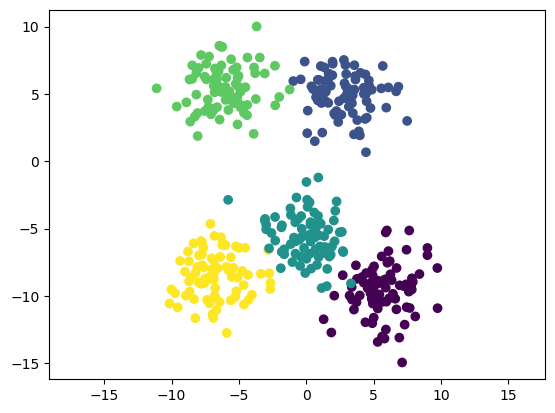

In [36]:
#| label: og-dataset
#| fig-cap: "El conjunto de datos original"

k = 5
X, y = make_blobs(400, 2, centers=k, cluster_std=1.8, random_state=10)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

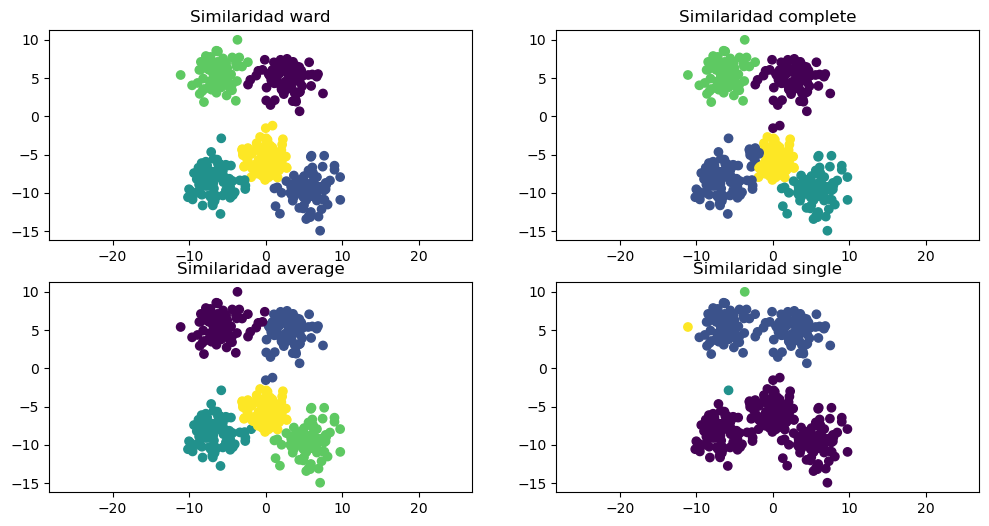

In [38]:
sim = ["ward", "complete", "average", "single"]
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
for i, s in enumerate(sim):
    agg = AgglomerativeClustering(5,linkage=s)
    y_agg = agg.fit(X).labels_
    ax[i//2,i%2].set_title(f"Similaridad {s}")
    ax[i//2,i%2].axis('equal')
    ax[i//2,i%2].scatter(X[:, 0], X[:, 1], c=y_agg)
plt.show()

Ahora veamos como se comporta con otro tipo de configuraciones de puntos.

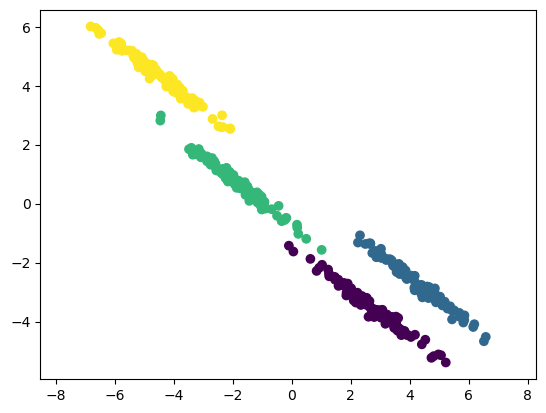

In [45]:
X, y = make_blobs(400, 2, centers=4, cluster_std=1, random_state=10)
trans = [[1, -0.8], [0.3, -0.1]]
X = np.dot(X, trans)
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

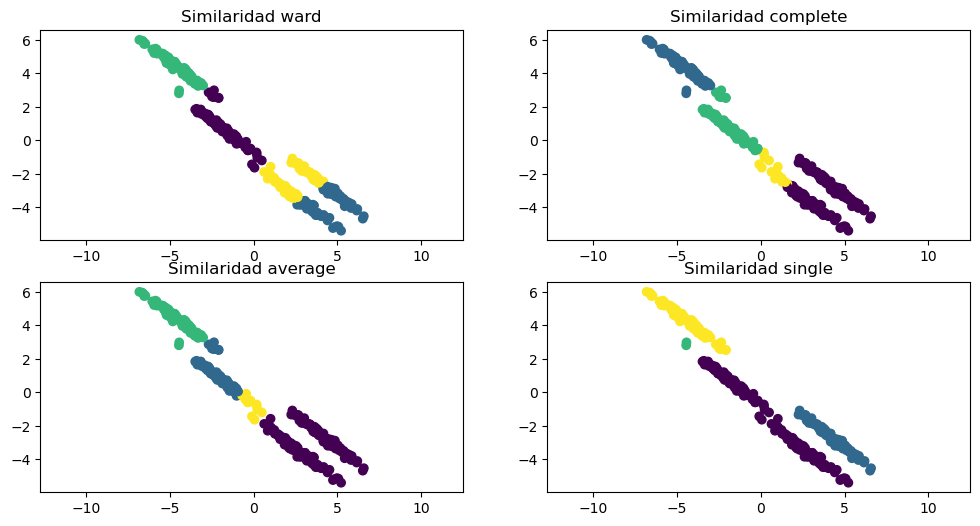

In [46]:
sim = ["ward", "complete", "average", "single"]
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
for i, s in enumerate(sim):
    agg = AgglomerativeClustering(4,linkage=s)
    y_agg = agg.fit(X).labels_
    ax[i//2,i%2].set_title(f"Similaridad {s}")
    ax[i//2,i%2].axis('equal')
    ax[i//2,i%2].scatter(X[:, 0], X[:, 1], c=y_agg)
plt.show()

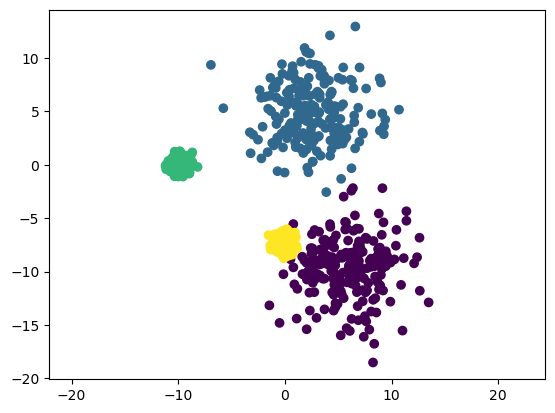

In [42]:
X, y = make_blobs(400, 2, centers=2, cluster_std=3, random_state=10)
X2, y2 = make_blobs(400, 2, centers=2, cluster_std=.5, random_state=9)
X = np.concatenate([X,X2])
y = np.concatenate([y,y2+2])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.axis('equal')
plt.show()

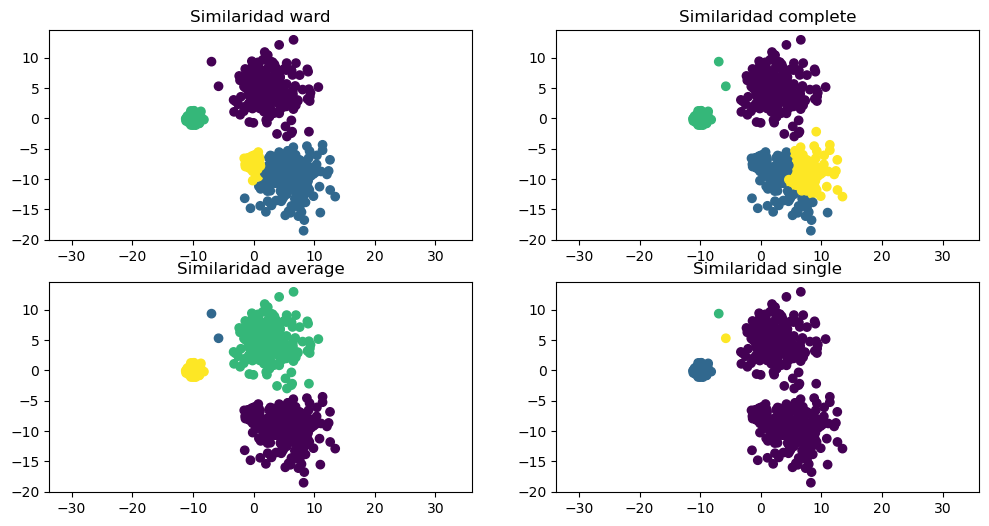

In [44]:
sim = ["ward", "complete", "average", "single"]
fig, ax = plt.subplots(2, 2, figsize=(12, 6))
for i, s in enumerate(sim):
    agg = AgglomerativeClustering(4,linkage=s)
    y_agg = agg.fit(X).labels_
    ax[i//2,i%2].set_title(f"Similaridad {s}")
    ax[i//2,i%2].axis('equal')
    ax[i//2,i%2].scatter(X[:, 0], X[:, 1], c=y_agg)
plt.show()

Como se puede observar en estos ejemplos muy sencillos, obtenemos resultados diferentes al variar las similitudes y depende del conjunto de datos la que mejor se adapte a ellos. 